In [1]:
import tensorflow as tf
import os 
import cv2
import numpy as np
import seaborn as sns
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications.vgg16 import VGG16
from keras_tuner import RandomSearch
import warnings
warnings.filterwarnings('ignore')

In [2]:
x,y=[],[]
path=r"D:\SINGULARIS SEPTEMBER\Data Sets For DL\Diabetic Retinopathy"
for i in os.listdir(path):
    for j in os.listdir(os.path.join(path,i)):
        fed_path=os.path.join(path,i,j)
        array=cv2.imread(fed_path)
        arr_resize=cv2.resize(array,(80,80))
        arr_reshape=arr_resize.reshape(80,80,3)
        arr_norm=arr_reshape/255
        x.append(arr_norm)
        y.append(i)
x=np.array(x)
y=np.array(y)
print(x.shape,y.shape)

(1800, 80, 80, 3) (1800,)


In [3]:
y

array(['0', '0', '0', ..., '4', '4', '4'], dtype='<U1')

0: No DR
1: Mild Non-Proliferative DR
2: Moderate Non-Proliferative DR
3: Severe Non-Proliferative DR
4: Proliferative DR

In [4]:
le=LabelEncoder()

In [5]:
y=le.fit_transform(y)
y

array([0, 0, 0, ..., 4, 4, 4], dtype=int64)

In [6]:
y.shape

(1800,)

In [9]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
print(len(xtrain),len(ytrain))
print(len(xtest),len(ytest))

1440 1440
360 360


In [11]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(1440, 80, 80, 3)
(1440,)
(360, 80, 80, 3)
(360,)


In [13]:
# xtrain

In [14]:
# xtest

In [15]:
ytrain

array([2, 2, 3, ..., 2, 4, 3], dtype=int64)

In [16]:
ytest

array([4, 2, 2, 0, 3, 0, 0, 0, 4, 2, 4, 2, 3, 2, 1, 3, 1, 2, 1, 4, 2, 1,
       1, 3, 1, 1, 1, 1, 4, 4, 4, 3, 1, 3, 0, 4, 4, 1, 3, 1, 4, 3, 4, 0,
       1, 0, 3, 0, 3, 4, 0, 3, 1, 3, 1, 3, 3, 0, 3, 4, 0, 1, 4, 1, 4, 4,
       4, 3, 1, 4, 1, 0, 0, 1, 1, 4, 2, 2, 0, 0, 4, 2, 1, 2, 0, 4, 4, 3,
       1, 1, 1, 0, 0, 4, 1, 1, 4, 1, 0, 0, 0, 1, 4, 4, 4, 1, 4, 1, 3, 2,
       1, 1, 2, 2, 1, 2, 1, 2, 1, 0, 1, 1, 0, 3, 4, 4, 2, 3, 0, 0, 4, 3,
       1, 0, 3, 1, 2, 0, 3, 0, 1, 3, 0, 3, 1, 1, 3, 4, 2, 3, 4, 4, 3, 4,
       0, 0, 2, 1, 1, 0, 1, 0, 4, 3, 2, 2, 4, 1, 2, 2, 2, 2, 3, 0, 4, 2,
       4, 3, 2, 3, 3, 1, 3, 1, 3, 0, 3, 4, 4, 1, 1, 2, 3, 3, 0, 3, 3, 4,
       3, 2, 2, 0, 2, 0, 4, 2, 4, 1, 4, 4, 4, 0, 2, 3, 1, 4, 3, 3, 2, 0,
       2, 4, 0, 0, 1, 1, 2, 2, 0, 2, 2, 0, 0, 3, 1, 2, 4, 1, 4, 0, 4, 3,
       0, 2, 0, 0, 2, 1, 3, 4, 4, 3, 4, 3, 4, 0, 2, 1, 3, 4, 4, 0, 0, 3,
       4, 2, 3, 4, 1, 2, 2, 3, 0, 1, 3, 3, 4, 0, 4, 2, 1, 1, 2, 0, 3, 0,
       1, 0, 3, 2, 2, 1, 0, 1, 0, 0, 1, 0, 1, 3, 3,

In [17]:
ytrain = np.asarray(ytrain).astype('int')
ytest = np.asarray(ytest).astype('int')

In [18]:
ytrain

array([2, 2, 3, ..., 2, 4, 3])

In [19]:
ytest

array([4, 2, 2, 0, 3, 0, 0, 0, 4, 2, 4, 2, 3, 2, 1, 3, 1, 2, 1, 4, 2, 1,
       1, 3, 1, 1, 1, 1, 4, 4, 4, 3, 1, 3, 0, 4, 4, 1, 3, 1, 4, 3, 4, 0,
       1, 0, 3, 0, 3, 4, 0, 3, 1, 3, 1, 3, 3, 0, 3, 4, 0, 1, 4, 1, 4, 4,
       4, 3, 1, 4, 1, 0, 0, 1, 1, 4, 2, 2, 0, 0, 4, 2, 1, 2, 0, 4, 4, 3,
       1, 1, 1, 0, 0, 4, 1, 1, 4, 1, 0, 0, 0, 1, 4, 4, 4, 1, 4, 1, 3, 2,
       1, 1, 2, 2, 1, 2, 1, 2, 1, 0, 1, 1, 0, 3, 4, 4, 2, 3, 0, 0, 4, 3,
       1, 0, 3, 1, 2, 0, 3, 0, 1, 3, 0, 3, 1, 1, 3, 4, 2, 3, 4, 4, 3, 4,
       0, 0, 2, 1, 1, 0, 1, 0, 4, 3, 2, 2, 4, 1, 2, 2, 2, 2, 3, 0, 4, 2,
       4, 3, 2, 3, 3, 1, 3, 1, 3, 0, 3, 4, 4, 1, 1, 2, 3, 3, 0, 3, 3, 4,
       3, 2, 2, 0, 2, 0, 4, 2, 4, 1, 4, 4, 4, 0, 2, 3, 1, 4, 3, 3, 2, 0,
       2, 4, 0, 0, 1, 1, 2, 2, 0, 2, 2, 0, 0, 3, 1, 2, 4, 1, 4, 0, 4, 3,
       0, 2, 0, 0, 2, 1, 3, 4, 4, 3, 4, 3, 4, 0, 2, 1, 3, 4, 4, 0, 0, 3,
       4, 2, 3, 4, 1, 2, 2, 3, 0, 1, 3, 3, 4, 0, 4, 2, 1, 1, 2, 0, 3, 0,
       1, 0, 3, 2, 2, 1, 0, 1, 0, 0, 1, 0, 1, 3, 3,

In [25]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(80,80,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(5,activation='softmax'))   

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 80, 80, 32)        896       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 40, 40, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 40, 40, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 20, 20, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 10, 10, 128)      

In [27]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
model.fit(xtrain,ytrain,batch_size=30,epochs=45,validation_data=(xtest,ytest))

Epoch 1/45
48/48 [==============================] - 11s 185ms/step - loss: 1.4427 - accuracy: 0.2847 - val_loss: 1.1885 - val_accuracy: 0.3306
Epoch 2/45
48/48 [==============================] - 8s 177ms/step - loss: 1.1605 - accuracy: 0.3819 - val_loss: 1.1313 - val_accuracy: 0.3722
Epoch 3/45
48/48 [==============================] - 9s 180ms/step - loss: 1.1399 - accuracy: 0.3924 - val_loss: 1.1373 - val_accuracy: 0.3444
Epoch 4/45
48/48 [==============================] - 9s 178ms/step - loss: 1.1224 - accuracy: 0.4243 - val_loss: 1.1067 - val_accuracy: 0.4306
Epoch 5/45
48/48 [==============================] - 9s 181ms/step - loss: 1.1267 - accuracy: 0.4354 - val_loss: 1.0982 - val_accuracy: 0.4361
Epoch 6/45
48/48 [==============================] - 9s 179ms/step - loss: 1.1006 - accuracy: 0.4444 - val_loss: 1.0699 - val_accuracy: 0.4750
Epoch 7/45
48/48 [==============================] - 9s 180ms/step - loss: 1.0711 - accuracy: 0.4639 - val_loss: 1.0865 - val_accuracy: 0.4639
Epoch

In [20]:
model.save('drdd61.h5')

In [7]:
model=load_model('drdd61.h5')

In [12]:
loss,accuracy=model.evaluate(xtest,ytest)
print(accuracy)

12/12 [==============================] - 1s 50ms/step - loss: 2.5627 - accuracy: 0.6111
0.6111111044883728


In [13]:
loss,accuracy=model.evaluate(xtrain,ytrain)
print(accuracy)

45/45 [==============================] - 2s 40ms/step - loss: 4.6353e-04 - accuracy: 1.0000
1.0


In [22]:
ypred=model.predict(xtest)
ypred

12/12 [==============================] - 1s 53ms/step


array([[2.2222793e-17, 5.7217219e-16, 6.4743696e-15, 5.0726580e-04,
        9.9949276e-01],
       [8.5838477e-04, 4.1907409e-04, 9.9872154e-01, 9.3946801e-07,
        1.7267176e-13],
       [4.6319015e-02, 1.9555048e-04, 9.5348525e-01, 1.4584565e-07,
        2.6694344e-17],
       ...,
       [1.1155056e-25, 6.1337722e-25, 1.4670340e-22, 7.3667606e-03,
        9.9263328e-01],
       [8.0006596e-17, 2.4421493e-17, 4.7304842e-15, 4.3369599e-02,
        9.5663041e-01],
       [7.9582659e-19, 1.4386039e-21, 7.2377998e-18, 9.9994099e-01,
        5.9045371e-05]], dtype=float32)

In [23]:
ar=[]
for i in ypred:
    ar.append(np.argmax(i))

In [24]:
cm=confusion_matrix(ytest,ar)
cm

array([[43,  8, 15,  3,  0],
       [22, 40, 13,  4,  2],
       [15, 15, 30,  3,  1],
       [ 2,  4,  6, 47, 10],
       [ 0,  2,  3, 12, 60]], dtype=int64)

<Axes: >

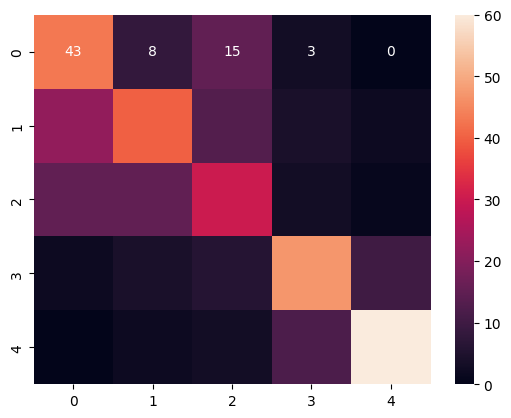

In [26]:
sns.heatmap(cm,annot=True)

In [27]:
test_path=r"D:\SINGULARIS SEPTEMBER\Data Sets For DL\Diabetic Retinopathy\0\20051021_51418_0100_PP.png"
image=cv2.imread(test_path)
i_resize=cv2.resize(image,(80,80))
i_reshape=i_resize.reshape(1,80,80,3)
i_norm=i_reshape/255

In [28]:
b=model.predict(i_norm)
b

1/1 [==============================] - 0s 31ms/step


array([[9.9626958e-01, 1.5493893e-05, 3.7135873e-03, 4.1346451e-07,
        9.5037586e-07]], dtype=float32)

In [29]:
a=np.argmax(b)
a

0

In [30]:
l = ['No DR','Mild Non-Proliferative DR','Moderate Non-Proliferative DR','Severe Non-Proliferative DR','Proliferative DR']
l[a]

'No DR'

In [40]:
test_path=r"D:\Singularis\Data Sets For Aug 2024\Diabetic Retinopathy\1\20051205_59300_0400_PP - Copy.png"
image=cv2.imread(test_path)
i_resize=cv2.resize(image,(80,80))
i_reshape=i_resize.reshape(1,80,80,3)
i_norm=i_reshape/255

In [41]:
b=model.predict(i_norm)
b

1/1 [==============================] - 0s 49ms/step


array([[9.3384873e-04, 9.9906605e-01, 8.2930150e-08, 2.5202757e-11,
        1.5993307e-12]], dtype=float32)

In [42]:
a=np.argmax(b)
a

1

In [43]:
l = ['No DR','Mild Non-Proliferative DR','Moderate Non-Proliferative DR','Severe Non-Proliferative DR','Proliferative DR']
l[a]

'Mild Non-Proliferative DR'

In [44]:
test_path=r"D:\Singularis\Data Sets For Aug 2024\Diabetic Retinopathy\2\20051214_41582_0100_PP.png"
image=cv2.imread(test_path)
i_resize=cv2.resize(image,(80,80))
i_reshape=i_resize.reshape(1,80,80,3)
i_norm=i_reshape/255

In [45]:
b=model.predict(i_norm)
b

1/1 [==============================] - 0s 47ms/step


array([[9.4865682e-04, 8.2813103e-06, 9.9904209e-01, 2.1835329e-07,
        7.1928577e-07]], dtype=float32)

In [46]:
a=np.argmax(b)
a

2

In [47]:
l = ['No DR','Mild Non-Proliferative DR','Moderate Non-Proliferative DR','Severe Non-Proliferative DR','Proliferative DR']
l[a]

'Moderate Non-Proliferative DR'

In [48]:
test_path=r"D:\Singularis\Data Sets For Aug 2024\Diabetic Retinopathy\4\17925_left.jpeg"
image=cv2.imread(test_path)
i_resize=cv2.resize(image,(80,80))
i_reshape=i_resize.reshape(1,80,80,3)
i_norm=i_reshape/255

In [49]:
b=model.predict(i_norm)
b

1/1 [==============================] - 0s 47ms/step


array([[8.3807388e-27, 1.0345358e-26, 1.4180675e-18, 1.7806422e-09,
        1.0000000e+00]], dtype=float32)

In [50]:
a=np.argmax(b)
a

4

In [51]:
l = ['No DR','Mild Non-Proliferative DR','Moderate Non-Proliferative DR','Severe Non-Proliferative DR','Proliferative DR']
l[a]

'Proliferative DR'

In [52]:
test_path=r"D:\Singularis\Data Sets For Aug 2024\Diabetic Retinopathy\3\27939_right.jpeg"
image=cv2.imread(test_path)
i_resize=cv2.resize(image,(80,80))
i_reshape=i_resize.reshape(1,80,80,3)
i_norm=i_reshape/255

In [53]:
b=model.predict(i_norm)
b

1/1 [==============================] - 0s 47ms/step


array([[1.5025911e-25, 1.3195283e-24, 1.0052649e-26, 1.0000000e+00,
        1.1932086e-10]], dtype=float32)

In [54]:
a=np.argmax(b)
a

3

In [55]:
l = ['No DR','Mild Non-Proliferative DR','Moderate Non-Proliferative DR','Severe Non-Proliferative DR','Proliferative DR']
l[a]

'Severe Non-Proliferative DR'